In [1]:
%matplotlib inline 

In [2]:
# must be in a seperate cell above the following commands
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
import numpy as np

In [3]:
from sys import path
path.append('/home/flo/cfs/CFS/share/python/')
from hdf5_tools import *

In [11]:
def computeCoeffHeave(f,v,R=1.0,g=9.81,rho=998.2,rho_disk=757.18,a_disk=0.25) :
    from numpy import pi,vstack
    m = (R**2*pi/2.0+2*R*a_disk)*rho_disk
    k_wp = 2*rho*g*R
    omega = 2*pi*f
 
    f_heave = -2.0*R
    m_a_heave = (k_wp - (f_heave/v).real )/omega**2 - m
    c_heave = (f_heave/v).imag/omega

    Sf = R**2*pi/2.
    Ca = m_a_heave/(rho*Sf)
    Cd = c_heave/(rho*Sf*omega)

    return Ca,Cd

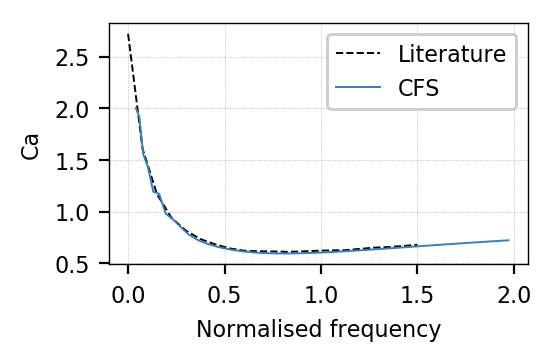

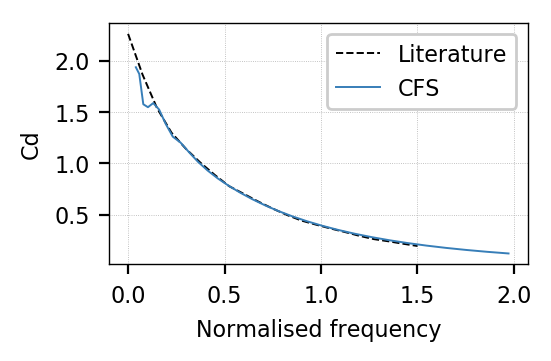

In [13]:
h5 = 'results_hdf5/test.cfs'
U = get_result(h5,'mechDisplacement','DISK',step='all')
It =  get_subregion_idx(h5,'DISK','DISK-TOP')
X = get_coordinates(h5,'DISK')
f = get_step_values(h5)[0]
u,v = np.mean(U[:,It,:],axis=1).T

f0H,CaH,CdH = np.loadtxt('Frank1967-cylinder-heave.csv',skiprows=1,unpack=True)
R = 1.0
g = 9.81
Ca,Cd = computeCoeffHeave(f,v,R=R,g=g)
f0 = R*(2*np.pi*f)**2/g

fig,ax = plt.subplots()
ax.plot(f0H,CaH,'--k',label='Literature')
ax.plot(f0,Ca,label='CFS')
ax.set_ylabel('Ca')
ax.set_xlabel('Normalised frequency')
ax.legend()

fig,ax = plt.subplots()
ax.plot(f0H,CdH,'--k',label='Literature')
ax.plot(f0,Cd,label='CFS')
ax.set_ylabel('Cd')
ax.set_xlabel('Normalised frequency')
ax.legend()